In [1]:
# Importing the Libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mn
import seaborn as sb
cs = ['#56d870', '#f9ee4a', '#44d9ff', '#f95b4a', '#3d9fe2', '#ffa847', '#c4ef7a', '#e195e2', '#ced9ed', '#fff29b']

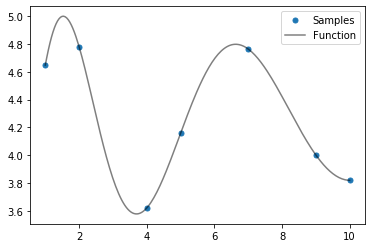

In [2]:
def fn(xs):
    return np.exp((xs + 10.5)**0.1) + np.sin(xs) / (xs + 1) + np.cos(2.5 * xs**0.5)**2

xs = np.array([1, 2, 4, 5, 7, 9, 10])
ys = fn(xs)
x_fine = np.linspace(1, 10, 200)
y_fine = fn(x_fine)

plt.plot(xs, ys, 'o', label="Samples", markersize=5)
plt.plot(x_fine, y_fine, label="Function", color="k", alpha=0.5, linestyle="-")
plt.legend();

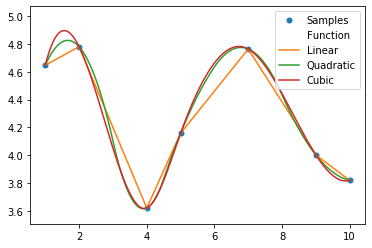

In [7]:
# Creating Stock-Standard Interpolation

from scipy.interpolate import interp1d

y_linear = interp1d(xs, ys, kind="linear")(x_fine)
y_quad = interp1d(xs, ys, kind="quadratic")(x_fine)
y_cubic = interp1d(xs, ys, kind="cubic")(x_fine)

plt.plot(xs, ys, 'o', label="Samples", markersize=5)
plt.plot(x_fine, y_fine, label="Function", color="w", ls="-", alpha=0.5)
plt.plot(x_fine, y_linear, label="Linear")
plt.plot(x_fine, y_quad, label="Quadratic")
plt.plot(x_fine, y_cubic, label="Cubic")
plt.legend();

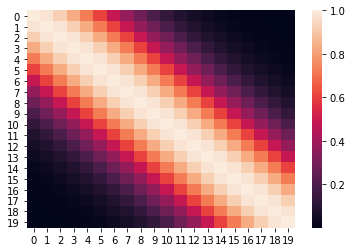

In [8]:
# Create a High Correlation Covariance Matrix

x = np.arange(20)
length = 50
cov = np.exp(-(1 / length) * (x - np.atleast_2d(x).T)**2) # (x-np.at) -> Turns our x(1D array) to a 2D array. It is the Distance
sb.heatmap(cov);

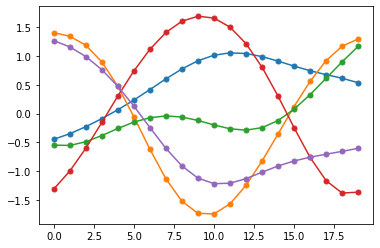

In [9]:
for i in range(5):
    # We asked for a Random Value from a Normal Distribution with Mean 0 and Covariance corr(20 Dimension)
    rvs = mn.rvs(cov=cov) # Multivatiate Normal. Random Variable Sample. 
    plt.plot(x, rvs, 'o-', ms=5)

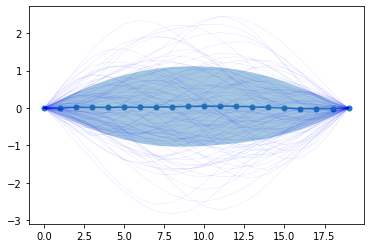

In [16]:
# Get other RVS with 200 samples
rvs = mn.rvs(cov= cov, size= 200)
# Align Start and End Values
rvs -= np.linspace(rvs[:, 0], rvs[:, -1], x.size).T  # Conceptual aid, not how you'd actually do it

mean = rvs.mean(axis=0) # Get Mean value for Each of our 20 datapoints
std = np.std(rvs, axis=0)

plt.plot(x, mean, "o-", ms=5)
plt.fill_between(x, mean + std, mean - std, alpha=0.4)
for i in range(100):
    plt.plot(x, rvs[i, :], ls="-", c="b", alpha=0.1, lw=0.5)

# Gaussian Distribution Special Property have a property that you can cut them in any way & you still get a Normal Distribution

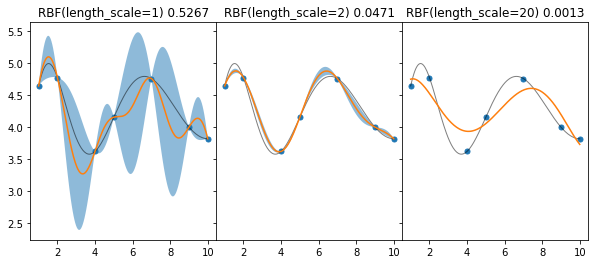

In [22]:
# The end point distribution is good(narrower), whereas as the distance from the endpoint increases, the distribution is
# all over the place(center), Spread. Our One Parameter for Gaussian is the Length Scale

# This Plot show How your Kernel Fixing Affects the Datapoints

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernels = [
    RBF(length_scale=1.0, length_scale_bounds=(1.0, 1.01)), 
    RBF(length_scale=2.0, length_scale_bounds=(2.0, 2.01)),
    RBF(length_scale=20.0, length_scale_bounds=(20.0, 20.01)),
]

fig, axes = plt.subplots(figsize=(10, 4), ncols=len(kernels), sharey=True)
fig.subplots_adjust(wspace=0, hspace=0)

for k, ax in zip(kernels, axes):
    gp = GaussianProcessRegressor(kernel=k)
    gp.fit(np.atleast_2d(xs).T, ys)
    
    y_mean, y_std = gp.predict(x_fine[:, None], return_std=True)

    ax.plot(xs, ys, 'o', label="Samples", markersize=5)
    ax.plot(x_fine, y_fine, label="Function", color="k", ls="-", lw=1, alpha=0.5)
    # Plot the Mean Fuction - Yellow Line
    ax.plot(x_fine, y_mean)
    ax.fill_between(x_fine, y_mean + 2 * y_std, y_mean - 2 * y_std, alpha=0.5)
    ax.set_title(str(k) + f" {y_std.max():0.4f}")
    

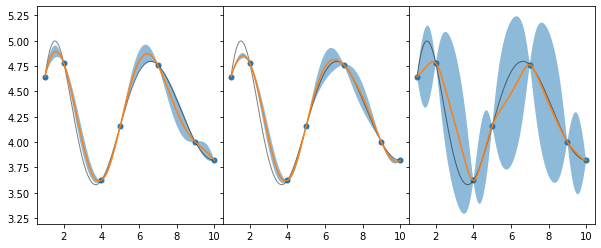

In [23]:
 # The First plot contains Huge Uncertainity; For 2nd plot, Uncertainity is more Realistic
    
# Testing for Multiple Kernels

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process.kernels import ExpSineSquared as ES, RationalQuadratic as RQ

kernels = [
    C() * RBF(), 
    ES(periodicity=10),
    C() * RQ() + RBF()
]

fig, axes = plt.subplots(figsize=(10, 4), ncols=len(kernels), sharey=True)
fig.subplots_adjust(wspace=0, hspace=0)

for k, ax in zip(kernels, axes):
    gp = GaussianProcessRegressor(kernel=k)
    gp.fit(np.atleast_2d(xs).T, ys)
    
    y_mean, y_std = gp.predict(x_fine[:, None], return_std=True)

    ax.plot(xs, ys, 'o', label="Samples", markersize=5)
    ax.plot(x_fine, y_fine, label="Function", color="k", ls="-", lw=1, alpha=0.5)
    ax.plot(x_fine, y_mean)
    ax.fill_between(x_fine, y_mean + 2 * y_std, y_mean - 2 * y_std, alpha=0.5)


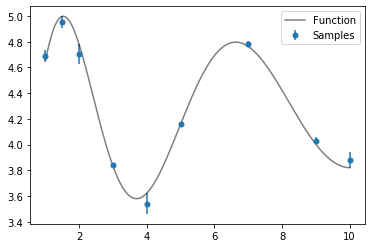

In [24]:
# Plotting of Gaussian Process with Uncertainity and Sample

np.random.seed(2)

xs2 = np.array([1, 1.5, 2, 3, 4, 5, 7, 9, 10])
ys2 = fn(xs2)

err_scale = np.random.uniform(low=0.03, high=0.1, size=ys2.shape)
err = np.random.normal(loc=0, scale=err_scale, size=ys2.shape)
ys_err = ys2 + err

plt.errorbar(xs2, ys_err, yerr=err, fmt="o", label="Samples", markersize=5)
plt.plot(x_fine, y_fine, label="Function", color="k", alpha=0.5, linestyle="-")
plt.legend();